In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import h5py
subhalo = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/fof_subhalo_tab_127.0.hdf5','r')
list(subhalo.get('Header').attrs.keys())

['BoxSize',
 'FlagDoubleprecision',
 'Git_commit',
 'Git_date',
 'HubbleParam',
 'Ngroups_ThisFile',
 'Ngroups_Total',
 'Nids_ThisFile',
 'Nids_Total',
 'Nsubgroups_ThisFile',
 'Nsubgroups_Total',
 'NumFiles',
 'Omega0',
 'OmegaLambda',
 'Redshift',
 'Time']

#### Aca vemos cuantos grupos y subhalos hay en los grupos

In [11]:
Ngroups_Total = subhalo.get('Header').attrs['Ngroups_Total']
print (Ngroups_Total)
Nsubgroups_Total = subhalo.get('Header').attrs['Nsubgroups_Total']
print (Nsubgroups_Total)

132641
81461


#### Aca leo las masas y posiciones de los halos para sacar los mas masivos

In [13]:
%%time
import gc
import h5py
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/'

SubMass = []
SubPos = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'fof_subhalo_tab_127.'+ str('%s'%i) +'.hdf5','r')
#     gr_mass = snap['Group/GroupMass'][()]
#     gr_pos  = snap['Group/GroupPos'][()]
#     gr_Nsub = snap['Group/GroupNsubs'][()]
    sub_mass = snap['Subhalo/SubhaloMass'][()]  
    sub_pos  = snap['Subhalo/SubhaloPos'][()]
    
    SubMass.append(sub_mass)
    SubPos.append(sub_pos)
    
SubMass = np.concatenate(SubMass)
SubPos  = np.concatenate(SubPos)

gc.collect()


CPU times: user 2.37 s, sys: 182 ms, total: 2.55 s
Wall time: 80 ms


22

#### Seleccionamos los 20 halos mas masivos

In [14]:
mask = np.argsort(SubMass)

SMass = SubMass[mask][::-1]*1e10

print (SMass[:20])

[1.57527586e+12 1.16998734e+12 5.75789335e+11 5.55212800e+11
 2.35702452e+11 1.81163065e+11 1.61315209e+11 1.48673790e+11
 1.44135864e+11 1.43819964e+11 1.33386396e+11 1.26789853e+11
 1.21189327e+11 1.01114544e+11 9.09461750e+10 8.68756685e+10
 7.65613261e+10 7.44905114e+10 7.35222088e+10 6.67219395e+10]


In [15]:
#Posicion de los 20 halos mas masivos
H_pos = SubPos[mask][::-1][:20]
print (H_pos)

[[48.81521  46.704514 53.605064]
 [48.71576  47.06235  53.33718 ]
 [46.974728 49.455475 51.771206]
 [47.528534 46.364803 54.832882]
 [47.325207 47.259197 51.91327 ]
 [47.791496 47.55743  53.327   ]
 [47.41012  48.306732 52.663097]
 [49.867104 47.25419  52.225414]
 [45.62381  46.928238 54.103687]
 [48.525105 48.03401  51.99552 ]
 [46.99904  49.67544  51.441345]
 [46.84732  46.249157 55.38245 ]
 [46.91023  50.354965 50.480793]
 [47.561237 48.625153 52.28775 ]
 [46.062164 50.05576  51.221386]
 [49.608597 44.904526 55.67278 ]
 [50.032932 44.561493 56.25295 ]
 [46.900036 49.43922  51.809025]
 [49.73617  41.36179  58.553463]
 [46.810642 50.414043 50.400394]]


#### Leo las posiciones de las particulas y los demas datos

In [40]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/'

StrPos  = []
StrMass = []
StrVel  = []
StrID   = []
StrMet  = []
StrTMet = []
StrBDen = []
StrBPos = []
StrBVel = []
StrSFT  = []

GasPos  = []
GasMass = []
GasVel  = []
GasID   = []
GasMet  = []
GasTMet = []

DrkPos  = []
DrkMass = []
DrkVel  = []
DrkID   = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'snapshot_127.'+ str('%s'%i) +'.hdf5','r')
    
    #stars
    pos_str    = snap['PartType4/Coordinates'][()]
    mass_str   = snap['PartType4/Masses'][()]
    vel_str    = snap['PartType4/Velocities'][()]
    ID_str     = snap['PartType4/ParticleIDs'][()]
    metal_str  = snap['PartType4/GFM_Metals'][()]
    totmet_str = snap['PartType4/GFM_Metallicity'][()]
    bden_str   = snap['PartType4/BirthDensity'][()]
    bpos_str   = snap['PartType4/BirthPos'][()]
    bvel_str   = snap['PartType4/BirthVel'][()]
    bSFT_str   = snap['PartType4/GFM_StellarFormationTime'][()]
    
    StrPos.append(pos_str)
    StrMass.append(mass_str)
    StrVel.append(vel_str)
    StrID.append(ID_str)
    StrMet.append(metal_str)
    StrTMet.append(totmet_str)
    StrBDen.append(bden_str)
    StrBPos.append(bpos_str)
    StrBVel.append(bvel_str)
    StrSFT.append(bSFT_str)

    #gas
    pos_gas    = snap['PartType0/Coordinates'][()]
    mass_gas   = snap['PartType0/Masses'][()]
    vel_gas    = snap['PartType0/Velocities'][()]
    ID_gas     = snap['PartType0/ParticleIDs'][()]
    metal_gas  = snap['PartType0/GFM_Metals'][()]
    totmet_gas = snap['PartType0/GFM_Metallicity'][()]
    
    GasPos.append(pos_gas)
    GasMass.append(mass_gas)
    GasVel.append(vel_gas)
    GasID.append(ID_gas)
    GasMet.append(metal_gas)
    GasTMet.append(totmet_gas)

    #dark matter
    pos_drk    = snap['PartType1/Coordinates'][()]
    mass_drk   = snap['PartType1/Masses'][()]
    vel_drk    = snap['PartType1/Velocities'][()]
    ID_drk     = snap['PartType1/ParticleIDs'][()]
    
    DrkPos.append(pos_drk)
    DrkMass.append(mass_drk)
    DrkVel.append(vel_drk)
    DrkID.append(ID_drk)

    
a = snap.get('Header').attrs['Time']
h = snap.get('Header').attrs['HubbleParam']

Omega0   = snap.get('Header').attrs['Omega0']
Omegab   = snap.get('Header').attrs['OmegaBaryon']
OmegaL   = snap.get('Header').attrs['OmegaLambda']
Redshift = snap.get('Header').attrs['Redshift']

Unit_Length = snap.get('Header').attrs['UnitLength_in_cm']
Unit_Mass   = snap.get('Header').attrs['UnitMass_in_g']
Unit_Veloc  = snap.get('Header').attrs['UnitVelocity_in_cm_per_s']

StrPos  = np.concatenate(StrPos)
StrMass = np.concatenate(StrMass)
StrVel  = np.concatenate(StrVel)
StrID   = np.concatenate(StrID)
StrMet  = np.concatenate(StrMet)
StrTMet = np.concatenate(StrTMet)
StrBDen = np.concatenate(StrBDen)
StrBPos = np.concatenate(StrBPos)
StrBVel = np.concatenate(StrBVel)
StrSFT  = np.concatenate(StrSFT)

GasPos  = np.concatenate(GasPos)
GasMass = np.concatenate(GasMass)
GasVel  = np.concatenate(GasVel)
GasID   = np.concatenate(GasID)
GasMet  = np.concatenate(GasMet)
GasTMet = np.concatenate(GasTMet)

DrkPos  = np.concatenate(DrkPos)
DrkMass = np.concatenate(DrkMass)
DrkVel  = np.concatenate(DrkVel)
DrkID   = np.concatenate(DrkID)

gc.collect()

CPU times: user 2min 30s, sys: 45 s, total: 3min 15s
Wall time: 20.5 s


15

In [4]:
print('Unit_Length=', Unit_Length) #---> Esto es en cm y equivale a 1Mpc
print('Unit_Mass=', Unit_Mass)  # ---> Esto es en g y equivale a 1e10Msol
print('Unit_Veloc=', Unit_Veloc)# ---> Esto es cm/s y equivale a 1km/s

Unit_Length= 3.085678e+24
Unit_Mass= 1.989e+43
Unit_Veloc= 100000.0


In [41]:
for j in range(1):
    
    StrPos = (StrPos - H_pos[j,:])*1000
    xstr = StrPos[:,0]
    ystr = StrPos[:,1]
    zstr = StrPos[:,2]
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    kstr, = np.where(rstr < 200)
    
    GasPos = (GasPos - H_pos[j,:])*1000
    xgas = GasPos[:,0]
    ygas = GasPos[:,1]
    zgas = GasPos[:,2]
    rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
    kgas,= np.where(rgas < 200)
    
    DrkPos = (DrkPos - H_pos[j,:])*1000
    xdrk = DrkPos[:,0]
    ydrk = DrkPos[:,1]
    zdrk = DrkPos[:,2]
    rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
    kdrk,= np.where(rdrk < 200)
    
    output_file = h5py.File('/z/omarioni/gradients/_simulations/snap_127.h5py', 'a')

    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Time',         data = a)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/h',            data = h)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Omega_0',      data = Omega0)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Omega_Baryon', data = Omegab)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Omega_Lambda', data = OmegaL)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Redshift',     data = Redshift)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Center',       data = H_pos[j,:])

    # if( (snap.npart[4] > 0) & (np.size(kstr) > 0) ):
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Coordinates',      data = StrPos[kstr,:], dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Masses',           data = StrMass[kstr],  dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Velocities',       data = StrVel[kstr,:], dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/IDs',              data = StrID[kstr])
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Metallicity',      data = StrMet[kstr],   dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Total_Metallicity',data = StrTMet[kstr],  dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Birth_Density',    data = StrBDen[kstr],  dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Birth_Position',   data = StrBPos[kstr],  dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Birth_Velocities', data = StrBVel[kstr],  dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/FormationTime',    data = StrSFT[kstr],   dtype=np.float32)


    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Coordinates',      data = GasPos[kgas,:], dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Masses',           data = GasMass[kgas],  dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Velocities',       data = GasVel[kgas,:], dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/IDs',              data = GasID[kgas])
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Metallicity',      data = GasMet[kgas],   dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Total_Metallicity',data = GasTMet[kgas],  dtype=np.float32)


    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Drk/Coordinates',      data = DrkPos[kdrk,:], dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Drk/Masses',           data = DrkMass[kdrk],     dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Drk/Velocities',       data = DrkVel[kdrk,:], dtype=np.float32)
    output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Drk/IDs',              data = DrkID[kdrk])


    output_file.close()

In [19]:
xstr = StrPos[:,0]
ystr = StrPos[:,1]
zstr = StrPos[:,2]

# xdrk = DrkPos[:,0]
# ydrk = DrkPos[:,1]
# zdrk = DrkPos[:,2]

# xgas = GasPos[:,0]
# ygas = GasPos[:,1]
# zgas = GasPos[:,2]

for i in range(1):
    
    x_str = (xstr - H_pos[i,0])*1000*a/h
    y_str = (ystr - H_pos[i,1])*1000*a/h
    z_str = (zstr - H_pos[i,2])*1000*a/h
    
    rstr = np.sqrt(x_str**2 + y_str**2 + z_str**2)
    
    mask, = np.where(rstr<50)

In [33]:
%%time

xstr = StrPos[:,0]
ystr = StrPos[:,1]
zstr = StrPos[:,2]

xdrk = DrkPos[:,0]
ydrk = DrkPos[:,1]
zdrk = DrkPos[:,2]

xgas = GasPos[:,0]
ygas = GasPos[:,1]
zgas = GasPos[:,2]

for i in range(1):
    
    x_str = (xstr - H_pos[i,0])*1000*a/h
    y_str = (ystr - H_pos[i,1])*1000*a/h
    z_str = (zstr - H_pos[i,2])*1000*a/h
    
    rstr = np.sqrt(x_str**2 + y_str**2 + z_str**2)
    
    mask, = np.where(rstr<50)
    
  
    

CPU times: user 31.9 s, sys: 2.15 s, total: 34.1 s
Wall time: 1.48 s


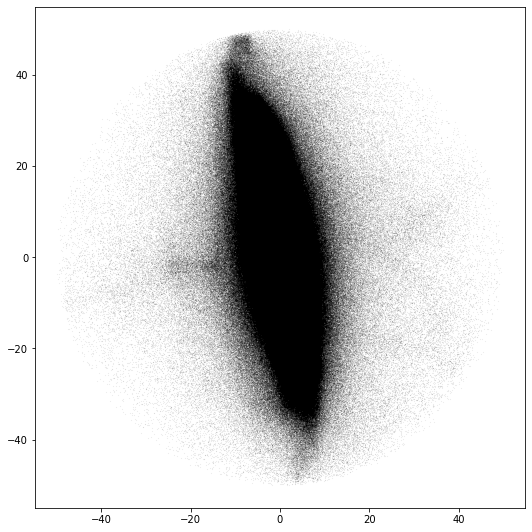

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(x_str[mask], y_str[mask],'.k',markersize=0.05)

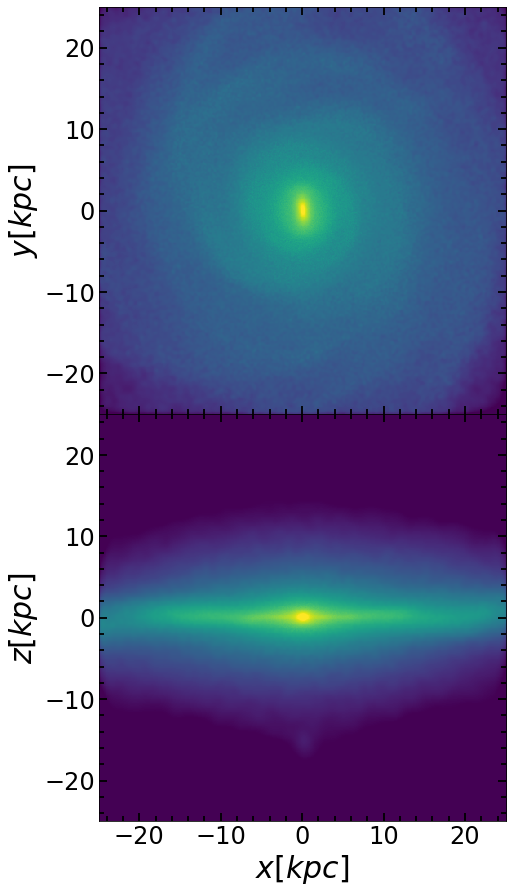

In [52]:
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np

vector = ('00','01','03')

snap = h5py.File('../_simulations/snap_127.h5py', 'r')

for i in range(0,1):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'][()]
#     r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_0'+ str('%s' %vector[i])+ '/Time'][()]
    h = snap['subhalo_0'+ str('%s' %vector[i])+ '/h'][()]

    pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    masa_str = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

#     z = a0/aexp - 1.
#     Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0])*aexp/h
    ystr = (pstr[:,1])*aexp/h
    zstr = (pstr[:,2])*aexp/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp)
    v_y = vel[:,1] *np.sqrt(aexp)
    v_z = vel[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
    masa_str = masa_str/h

#     r200 = r200*aexp/h
#     rgal=0.15*r200

#     limit = np.where(r<rgal)
#     r_sort = np.sort(r[limit])
#     r_indice = np.argsort(r[limit])

#     Mc_str = cumsum((masa_str[limit])[r_indice])
#     M_gal = Mc_str[-1]

# #------------------ calculamos M90------------------------------------------
#     razon = Mc_str/M_gal
#     noventa, = np.where(razon < 0.9)
#     cincuenta, = np.where(razon < 0.5)

#     r90 = r_sort[noventa]
#     r50 = r_sort[cincuenta]
#     M90 = Mc_str[noventa]                

# #------------------masa total en r200 (Mvir)--------------------------         
#     corte,=np.where(r<r90[-1])
    veloc,=np.where(r<3)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,5)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([np.size(xn),3])
    pos[:,0]=xn
    pos[:,1]=yn
    pos[:,2]=zn

#---------------------generador del gráfico-----------------
    rl=25   
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
    vmin=6.3
    vmax=9.8

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

#-----grafico-----------
    fig=plt.figure(1,figsize=(8,13))
    fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

    particles=sph.Particles(pos[corte,:],masa_str[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend1=sph.Render(escena)
    extent=escena.get_extent()
    rend1.set_logscale()

    ax1=fig.add_subplot(211)
    plt.imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    #ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
    ax1.set_xticklabels([])
    #plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y[kpc]$', fontsize=30)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24)
    ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
#     plt.text(-22, 21,'GADGET-'+'%s'%vector2[i], fontsize=24, color='yellow', ha='left', va='center') 
             #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
    #plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
    #              ha='center', va='center', 
    #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))

    #plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')


    particles=sph.Particles(pos[corte,:],masa_str[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax2=fig.add_subplot(212)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    plt.xlabel('$x[kpc]$', fontsize=30)
    plt.ylabel('$z[kpc]$', fontsize=30)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=24)
    ax2.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax2.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
    #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
    
    plt.show()
    #plt.clf()


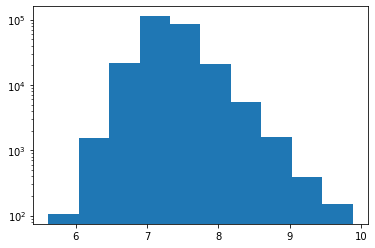

In [53]:
rend1.histogram(log=True)

In [42]:
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np

vector = ('00','01','03')

snap = h5py.File('../_simulations/snap_127.h5py', 'r')

for i in range(0,1):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'][()]
#     r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_0'+ str('%s' %vector[i])+ '/Time'][()]
    h = snap['subhalo_0'+ str('%s' %vector[i])+ '/h'][()]

    pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    masa_str = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

#     z = a0/aexp - 1.
#     Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0])
    ystr = (pstr[:,1])
    zstr = (pstr[:,2])
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

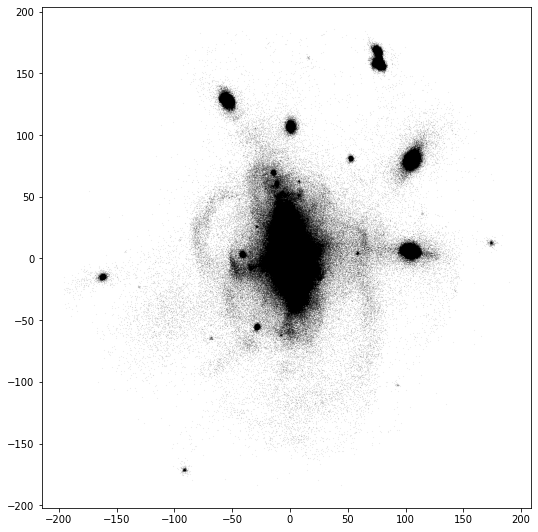

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xstr, ystr,'.k',markersize=0.05)

In [31]:
snap = h5py.File('../_simulations/snap_127.h5py', 'r')
def printname(name):
    print (name)
snap.visit(printname)

subhalo_000
subhalo_000/Center
subhalo_000/Drk
subhalo_000/Drk/Coordinates
subhalo_000/Drk/IDs
subhalo_000/Drk/Masses
subhalo_000/Drk/Velocities
subhalo_000/Gas
subhalo_000/Gas/Coordinates
subhalo_000/Gas/IDs
subhalo_000/Gas/Masses
subhalo_000/Gas/Metallicity
subhalo_000/Gas/Total_Metallicity
subhalo_000/Gas/Velocities
subhalo_000/Omega_0
subhalo_000/Omega_Baryon
subhalo_000/Omega_Lambda
subhalo_000/Redshift
subhalo_000/Str
subhalo_000/Str/Birth_Density
subhalo_000/Str/Birth_Position
subhalo_000/Str/Birth_Velocities
subhalo_000/Str/Coordinates
subhalo_000/Str/FormationTime
subhalo_000/Str/IDs
subhalo_000/Str/Masses
subhalo_000/Str/Metallicity
subhalo_000/Str/Total_Metallicity
subhalo_000/Str/Velocities
subhalo_000/Time
subhalo_000/h


In [32]:
pstr = snap['subhalo_000/Str/Coordinates'][()]

In [33]:
print (np.shape(pstr))

(5210495, 3)
